**Group Members**

*   XINYI LI (21147426): Exploratory Data Analysis (EDA) 25%
*   YANG YE (20084455): Data Preparation and Predictive modelling(SVM) 25%
*   SHUANGJIA YANG (22036172): Clustering and Manifold Learning (Clustering) 25%
*   RICARD HELVID ADRIAN (22060006) : Comparison of Binary Classifiers and Dimensionality Reduction (Predictive Modelling) 25%

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import manifold
from sklearn import cluster 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('./mushrooms_sample.csv')

# EDA

In [106]:
df.tail()

cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
3995         f           y         e          f    y               f   
3996         f           s         w          t    n               f   
3997         f           s         w          t    n               f   
3998         f           y         e          f    s               f   
3999         f           s         n          f    y               f   

     gill-spacing gill-size gill-color stalk-shape  ...  \
3995            c         n          b           t  ...   
3996            c         b          w           e  ...   
3997            c         b          w           e  ...   
3998            c         n          b           t  ...   
3999            c         n          b           t  ...   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
3995                      p                      p         p          w   
3996                      w                      w         p          w   
3997                      w                      w         p          w   
3998                      p                      p         p          w   
3999                      p                      w         p          w   

     ring-number ring-type spore-print-color population habitat class  
3995           o         e                 w          v       p     p  
3996           t         p                 r          v       g     p  
3997           t         p                 r          v       m     p  
3998           o         e                 w          v       l     p  
3999           o         e                 w          v       d     p  

[5 rows x 23 columns]

In [107]:
print('(number of examples, number of attributes): ', df.shape)

(number of examples, number of attributes):  (4000, 23)


####   ---Quick Examination of Categorical Attributes

In [108]:
df['class'].value_counts()

e    2000
p    2000
Name: class, dtype: int64

In [109]:
df.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  1230
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [110]:
df['odor'].value_counts()

n    1692
f    1099
s     288
y     285
l     190
a     188
p     142
c     100
m      16
Name: odor, dtype: int64

We can see that there are many types of smells, among which n, f are the most, and m is the least

In [111]:
df['odor'].count()

4000

In [112]:
df['cap-shape'].value_counts()

x    1758
f    1593
k     411
b     217
s      20
c       1
Name: cap-shape, dtype: int64

In [113]:
df['habitat'].value_counts()

d    1548
g    1023
p     582
l     404
u     197
m     148
w      98
Name: habitat, dtype: int64

In [114]:
df['population'].value_counts()

v    2028
y     839
s     603
n     193
a     171
c     166
Name: population, dtype: int64

In [115]:
df['cap-color'].value_counts()

n    1154
g     917
e     727
w     501
y     496
b      88
p      83
c      17
r      10
u       7
Name: cap-color, dtype: int64

In [116]:
df.dtypes

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises%3F                  object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
class                       object
dtype: object

### plot the frequency histogram of any attribute

In [117]:
frequency_table = df['odor'].value_counts(ascending=True)
print('Frequency Table for odor:') 
print(frequency_table)

Frequency Table for odor:
m      16
c     100
p     142
a     188
l     190
y     285
s     288
f    1099
n    1692
Name: odor, dtype: int64


In [118]:
frequency_table.plot(kind='bar')
plt.xlabel('odor')
plt.ylabel('The number of per-odor')
plt.title('odor distribute')
plt.show()

### Change all attributes that have two valuess to 0 and 1

In [119]:
from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

labelencoder=LabelEncoder()
for col in df.columns:
    if len(df[col].value_counts())==2:

        df[col]=labelencoder.fit_transform(df[col])
df.head()

cap-shape cap-surface cap-color  bruises%3F odor  gill-attachment  \
0         x           f         e           1    n                1   
1         f           y         g           1    n                1   
2         x           s         p           1    n                1   
3         b           s         w           0    n                1   
4         f           y         e           1    n                1   

   gill-spacing  gill-size gill-color  stalk-shape  ...  \
0             0          0          u            1  ...   
1             0          0          u            1  ...   
2             0          0          w            0  ...   
3             1          0          g            0  ...   
4             0          0          w            1  ...   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      p                      g         p          w   
1                      w                      g         p          w   
2                      w                      e         p          w   
3                      w                      w         p          w   
4                      p                      p         p          w   

  ring-number ring-type spore-print-color population habitat class  
0           o         p                 k          v       d     0  
1           o         p                 k          v       d     0  
2           t         e                 w          c       w     0  
3           t         p                 w          n       g     0  
4           o         p                 n          v       d     0  

[5 rows x 23 columns]

In [120]:
df.dtypes

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises%3F                   int64
odor                        object
gill-attachment              int64
gill-spacing                 int64
gill-size                    int64
gill-color                  object
stalk-shape                  int64
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
class                        int64
dtype: object

### Frequency histogram of edible and poisonous mushrooms

In [121]:
count = df['class'].value_counts()
count.values
plt.figure(figsize=(8,7))
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('0: Edible; 1: Poisonous', fontsize=12)
plt.title('Number of edible/poisonous mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

### Heatmap of the attributes which value trans into 0,1

<ipython-input-122-1ecf3a26e83c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

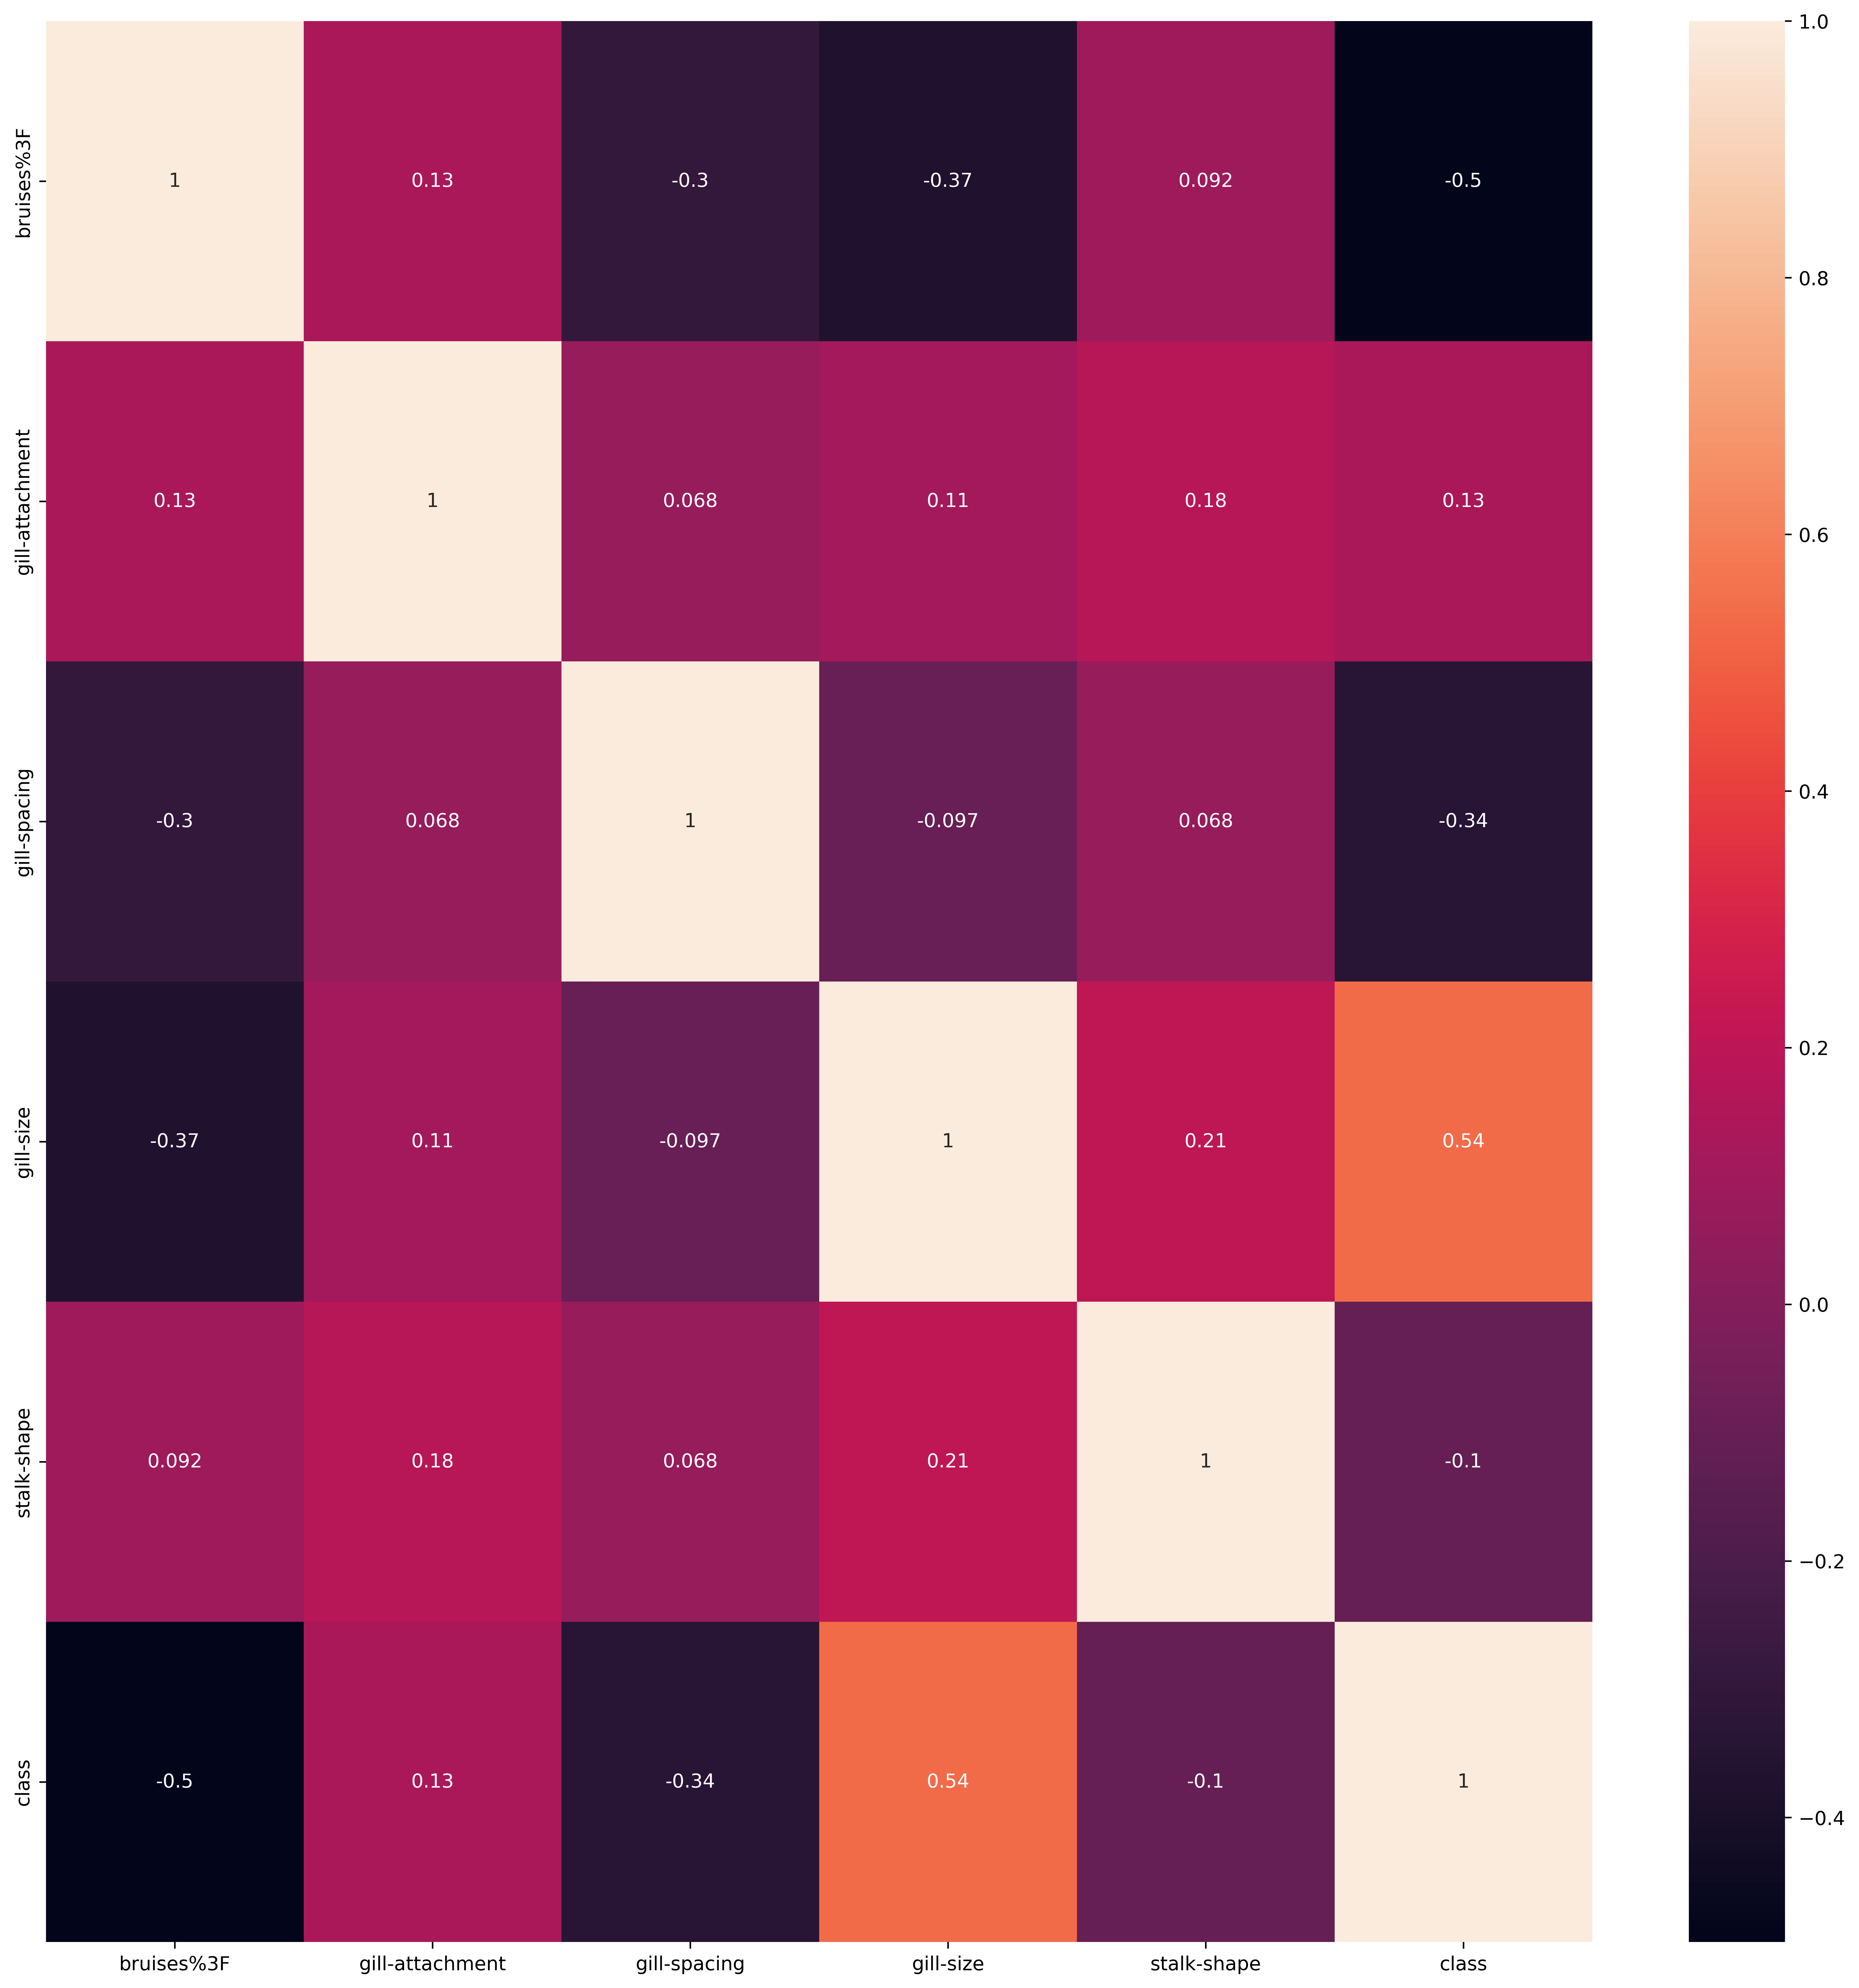

In [122]:
plt.figure(figsize=(18,18),dpi=500)
sns.heatmap(df.corr(),annot=True)

In [123]:
pd.crosstab(df['class'], df['population']).plot(kind="bar",
                                              figsize=(10, 6));
plt.title("Edibility of mushroom based on population")
plt.xlabel("0: Edible; 1: Poisonous")
plt.ylabel("Amount")
plt.legend(["abundant", "clustered", "numerous", "scattered", "several", "solitary"])
plt.xticks(rotation=0);

In [124]:
pd.crosstab(df['class'], df['habitat']).plot(kind="bar",
                                              figsize=(10, 6));
plt.title("Edibility of mushroom based on habitat")
plt.xlabel("0: Edible; 1: Poisonous")
plt.ylabel("Amount")
plt.legend(["grasses", "leaves", "meadows", "paths", "urban", "waste", "woods"])
plt.xticks(rotation=0);

According to the population distribution and living environment, I have concluded that several mushrooms have a high probability of being poisonous, and mushrooms that are abundant, clustered and numerous are generally edible mushrooms; mushrooms that grow on paths and woods are basically non-toxic. Poisonous, is grow in urban, probably because the pollution of the environment, but we can't judge whether the mushrooms growing on grass and leaves are poisonous according to the living environment, because they have the same probability.

## Data Preparation

In [125]:
df = pd.read_csv('./mushrooms_sample.csv')
print(df.isna().sum())
df.describe()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  1230
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64


cap-shape cap-surface cap-color bruises%3F  odor gill-attachment  \
count       4000        4000      4000       4000  4000            4000   
unique         6           4        10          2     9               2   
top            x           y         n          f     n               f   
freq        1758        1620      1154       2334  1692            3901   

       gill-spacing gill-size gill-color stalk-shape  ...  \
count          4000      4000       4000        4000  ...   
unique            2         2         12           2  ...   
top               c         b          b           t  ...   
freq           3384      2724        870        2250  ...   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    4000                   4000      4000       4000   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     2204                   2154      4000       3904   

       ring-number ring-type spore-print-color population habitat class  
count         4000      4000              4000       4000    4000  4000  
unique           3         5                 9          6       7     2  
top              o         p                 w          v       d     e  
freq          3690      1946              1186       2028    1548  2000  

[4 rows x 23 columns]

In [126]:
df['stalk-root'].value_counts()

b    1868
e     545
c     266
r      91
Name: stalk-root, dtype: int64

There are 30% Nan value of column `stalk-root`, so we decide to drop it.

In [127]:
df.drop('stalk-root', axis=1, inplace=True)

### One-Hot Encode All Categorical Attributes

In [129]:
df = pd.get_dummies(df, columns=[i for i in df.columns if i != 'class'], drop_first=True)
df.tail()

class  cap-shape_c_1  cap-shape_f_1  cap-shape_k_1  cap-shape_s_1  \
3995     p              0              1              0              0   
3996     p              0              1              0              0   
3997     p              0              1              0              0   
3998     p              0              1              0              0   
3999     p              0              1              0              0   

      cap-shape_x_1  cap-surface_g_1  cap-surface_s_1  cap-surface_y_1  \
3995              0                0                0                1   
3996              0                0                1                0   
3997              0                0                1                0   
3998              0                0                0                1   
3999              0                0                1                0   

      cap-color_c_1  ...  population_n_1  population_s_1  population_v_1  \
3995              0  ...               0               0               1   
3996              0  ...               0               0               1   
3997              0  ...               0               0               1   
3998              0  ...               0               0               1   
3999              0  ...               0               0               1   

      population_y_1  habitat_g_1  habitat_l_1  habitat_m_1  habitat_p_1  \
3995               0            0            0            0            1   
3996               0            1            0            0            0   
3997               0            0            0            1            0   
3998               0            0            1            0            0   
3999               0            0            0            0            0   

      habitat_u_1  habitat_w_1  
3995            0            0  
3996            0            0  
3997            0            0  
3998            0            0  
3999            0            0  

[5 rows x 92 columns]

**Conclusion**

> We found all features are categorical attribute, so we decide to use one-hot encode to tranform them to numberic.



# Clustering

In [130]:
from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

In [131]:

class_map = {'e':1, 'p':0}
df['class']=df['class'].replace(class_map)

data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (4000, 92)


In [132]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [133]:
k = 3

In [134]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [135]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [136]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete


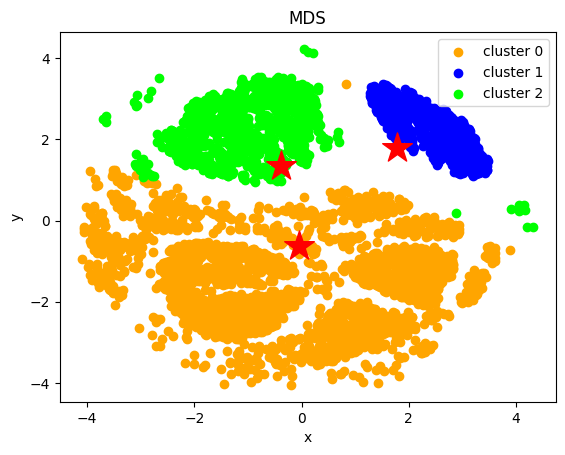

In [137]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [138]:
df['labels'] = clustered_data_sklearn.labels_
df[['class', 'labels']]

class  labels
0         1       0
1         1       0
2         1       0
3         1       0
4         1       0
...     ...     ...
3995      0       2
3996      0       0
3997      0       0
3998      0       2
3999      0       2

[4000 rows x 2 columns]

In [139]:
print(df[df['labels'] == 1]['class'].value_counts())
print(df[df['labels'] == 0]['class'].value_counts())
print(df[df['labels'] == 2]['class'].value_counts())

0    649
Name: class, dtype: int64
1    1984
0     443
Name: class, dtype: int64
0    908
1     16
Name: class, dtype: int64


**Conclusion**



> We set the k value to 3 because there are three types, the cluster0 is poisonous, the cluster1 is eatable, and the cluster2 is uncertain.As we can see from the MDS, edible mushrooms make up a relatively large proportion of the total.




> K-means clustering classifies data into different clusters, so it can help people understand the data better.The data can also be visualised to show the percentage of each class.However, when using K-means clustering, the number of clusters K needs to be specified in advance, which may require some operators to have some understanding of the data.The results of the K-means clustering algorithm depend on the location of the initial randomly selected cluster centres, and if the initial cluster centres are not well placed, then the final clustering results may be limited and not optimal.



> It divides the objects in a dataset into different groups or clusters. The main goal of cluster analysis is to find similar objects and group them so that the underlying patterns in the dataset can be better understood



# Predictive modelling

In [140]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
from sklearn.feature_selection import RFE
class AddColumnNames(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X, columns=self.columns)

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X[self.columns]

In [141]:
df.drop('labels', axis=1, inplace=True)
names_all = [i for i in df.columns if i != 'class']
preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    make_pipeline(
            ColumnSelector(columns=names_all),
            StandardScaler()
        )
)

In [142]:
mapper = {'e': 1, 'p':0 }
df['class'] = df['class'].astype(str).replace(mapper)
y = df['class']
X = df.drop('class', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

In [151]:
# create the pipeline
N_FEATURES_OPTIONS = [15, 30, 45]
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'), 
                       ('svm', svm.SVC(probability=True))])
param_grid = [
     {
        'reduce_dim': [FastICA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'svm__C': [0.1, 1, 10, 100],
        'svm__gamma': [1, 0.1, 0.01, 0.001], 
        'svm__kernel': ['rbf', 'linear', 'poly']
     }
]

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train) 

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
SVM_best_params = search.best_params_
SVM_best_model = search.best_estimator_

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Best CV score = 0.992:
Best parameters:  {'reduce_dim': FastICA(n_components=45), 'reduce_dim__n_components': 45, 'svm__C': 100, 'svm__gamma': 1, 'svm__kernel': 'rbf'}


In [144]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),
                       ('reduce_dim', 'passthrough'),
                       ('rf', RandomForestClassifier())])

param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'rf__n_estimators' : [5,10,20],
        'rf__max_depth': [6, 8, 10, 12]
    },
    {
        'reduce_dim': [FastICA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'rf__n_estimators' : [5,10,20],
        'rf__max_depth': [6, 8, 10, 12]
    },
    {
        'reduce_dim': [TruncatedSVD()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'rf__n_estimators' : [5,10,20],
        'rf__max_depth': [8, 10, 12, 14]
    }
]

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

RF_best_params = search.best_params_
RF_best_model = search.best_estimator_

Best CV score = 1.000:
Best parameters:  {'reduce_dim': TruncatedSVD(n_components=30), 'reduce_dim__n_components': 30, 'rf__max_depth': 14, 'rf__n_estimators': 20}


In [145]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),
                       ('reduce_dim', 'passthrough'),
                       ('knn', KNeighborsClassifier())])

param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'knn__n_neighbors' : [1,2,3],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan']
    },
    {
        'reduce_dim': [FastICA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'knn__n_neighbors' : [1,2,3],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan']
    },
    {
        'reduce_dim': [TruncatedSVD()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'knn__n_neighbors' : [1,2,3],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan']
    }
]

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

KNN_best_params = search.best_params_
KNN_best_model = search.best_estimator_

Best CV score = 1.000:
Best parameters:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'reduce_dim': PCA(iterated_power=7, n_components=15), 'reduce_dim__n_components': 15}


## Classifiers evaluation

In [146]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

In [147]:
def evaluate_model(X_test, y_test, model):
    # compute probabilistic predictiond for the evaluation set
    _probabilities = model.predict_proba(X_test)[:, 1]
    
    # compute exact predictiond for the evaluation set
    _predicted_values = model.predict(X_test)
        
    # compute accuracy
    _accuracy = accuracy_score(y_test, _predicted_values)
        
    # compute precision, recall and f1 score for class 1
    _precision, _recall, _f1_score, _ = precision_recall_fscore_support(y_test, _predicted_values, labels=[1])
    
    # compute fpr and tpr values for various thresholds 
    # by comparing the true target values to the predicted probabilities for class 1
    _fpr, _tpr, _ = roc_curve(y_test, _probabilities,pos_label='1')
        
    # compute true positive rates for the values in the array mean_fpr
    _tpr_transformed = np.array([np.interp(mean_fpr, _fpr, _tpr)])
    
    # compute the area under the curve
    _auc = auc(_fpr, _tpr)
            
    return _accuracy, _precision[0], _recall[0], _f1_score[0], _tpr_transformed, _auc

In [152]:
SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score, SVM_tpr, SVM_auc = evaluate_model(X_test, y_test, SVM_best_model)
RF_accuracy, RF_precision, RF_recall, RF_f1_score, RF_tpr, RF_auc = evaluate_model(X_test, y_test, RF_best_model)
KNN_accuracy, KNN_precision, KNN_recall, KNN_f1_score, KNN_tpr, KNN_auc = evaluate_model(X_test, y_test, KNN_best_model)

/usr/local/lib/python3.9/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.9/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.9/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


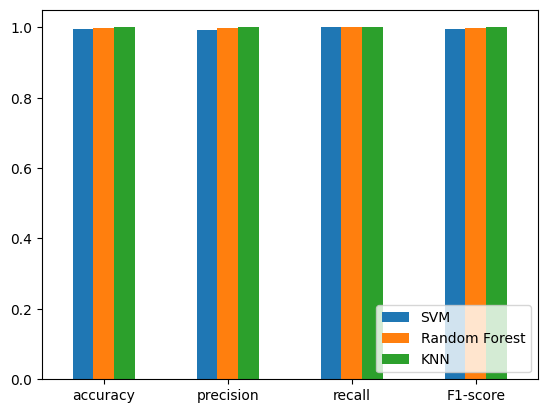

In [153]:
SVM_metrics = np.array([SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score])
RF_metrics = np.array([RF_accuracy, RF_precision, RF_recall, RF_f1_score])
KNN_metrics = np.array([KNN_accuracy, KNN_precision, KNN_recall, KNN_f1_score])
index = ['accuracy', 'precision', 'recall', 'F1-score']
df_metrics = pd.DataFrame({'SVM': SVM_metrics, 'Random Forest': RF_metrics, 'KNN': KNN_metrics}, index=index)
df_metrics.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()

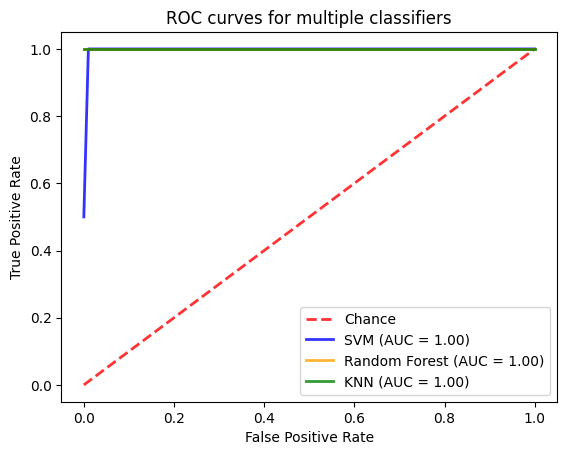

In [154]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.plot(mean_fpr, SVM_tpr[0,:], lw=2, color='blue', label='SVM (AUC = %0.2f)' % (SVM_auc), alpha=0.8)
plt.plot(mean_fpr, RF_tpr[0,:], lw=2, color='orange', label='Random Forest (AUC = %0.2f)' % (RF_auc), alpha=0.8)
plt.plot(mean_fpr, KNN_tpr[0,:], lw=2, color='green', label='KNN (AUC = %0.2f)' % (KNN_auc), alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multiple classifiers')
plt.legend(loc="lower right")
plt.show()

**Conclusion**

> The algorithm that trained the best model is the K-Nearest Neighbors (KNN) algorithm. From the GridSearchCV done above to select the best hyperparameters, KNN showed the best performance; one of the areas where it has an advantage is in the number of columns required to train the best model. Although both KNN and Random Forest have 1.000 as their best CV score, Random Forest requires 30 columns to produce its best model, while KNN only requires 15 columns. The options set for the number of columns are 15, 30 and 45 in GridSearchCV.

> KNN also has the best accuracy, precision, and F1-score out of the other 2 algorithms.

> The worst performing algorithm, although only slightly worse compared to the other 2 algorithms, is the SVM. It requires 45 columns to produce its best model; and it also has the worst CV score, accuracy, precision, and F1-score out of the 3 algorithms.

> Another factor that we have to take into account is the execution time to train the models, SVM required around 23 minutes to train its model, while Random Forest and KNN only required around 1 minute to train their models. This is the reason why we only chose 1 dimensionality reduction technique to train the SVM model (FastICA, which is one of the faster techniques), while the other 2 algorithms had multiple options for dimensionality reduction techniques. A possible reason for why SVM required a lot of time to execute might be due to the large number of dataset.